# Market Segmentation

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [9]:
sm_df = pd.read_csv("/Users/krummelha/Downloads/social_marketing.csv").dropna()

In [11]:
sm_df = sm_df.drop(columns = 'Unnamed: 0')

In [13]:
sm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   chatter           7882 non-null   int64
 1   current_events    7882 non-null   int64
 2   travel            7882 non-null   int64
 3   photo_sharing     7882 non-null   int64
 4   uncategorized     7882 non-null   int64
 5   tv_film           7882 non-null   int64
 6   sports_fandom     7882 non-null   int64
 7   politics          7882 non-null   int64
 8   food              7882 non-null   int64
 9   family            7882 non-null   int64
 10  home_and_garden   7882 non-null   int64
 11  music             7882 non-null   int64
 12  news              7882 non-null   int64
 13  online_gaming     7882 non-null   int64
 14  shopping          7882 non-null   int64
 15  health_nutrition  7882 non-null   int64
 16  college_uni       7882 non-null   int64
 17  sports_playing    7882 non-null  

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA

In [16]:
relevant_columns = sm_df.columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sm_df[relevant_columns])


In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality before TSNE
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_result


array([[ 1.19741429,  0.87909098],
       [ 0.36330567, -2.00545422],
       [ 0.15412205,  1.17651307],
       ...,
       [ 0.05933392,  0.64071383],
       [-0.93092108, -0.35847375],
       [ 2.06824588,  0.82023063]])

In [21]:
# Now run TSNE on the PCA-reduced data
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=10)
tsne_results = tsne.fit_transform(pca_result)

tsne_results[:10]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7882 samples in 0.007s...
[t-SNE] Computed neighbors for 7882 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7882
[t-SNE] Computed conditional probabilities for sample 2000 / 7882
[t-SNE] Computed conditional probabilities for sample 3000 / 7882
[t-SNE] Computed conditional probabilities for sample 4000 / 7882
[t-SNE] Computed conditional probabilities for sample 5000 / 7882
[t-SNE] Computed conditional probabilities for sample 6000 / 7882
[t-SNE] Computed conditional probabilities for sample 7000 / 7882
[t-SNE] Computed conditional probabilities for sample 7882 / 7882
[t-SNE] Mean sigma: 0.087166
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.923019
[t-SNE] KL divergence after 1000 iterations: 1.105898


array([[ 14.995698 ,   7.7620225],
       [  9.445381 , -22.750404 ],
       [  5.905963 ,  19.15611  ],
       [-13.544398 ,  -4.5802665],
       [-22.93463  ,  21.786469 ],
       [ -6.4871097,  17.039553 ],
       [ -4.1029377,  -1.4434899],
       [ 22.52968  ,  27.255129 ],
       [ 28.710567 ,  15.418341 ],
       [ 33.26317  , -13.091762 ]], dtype=float32)

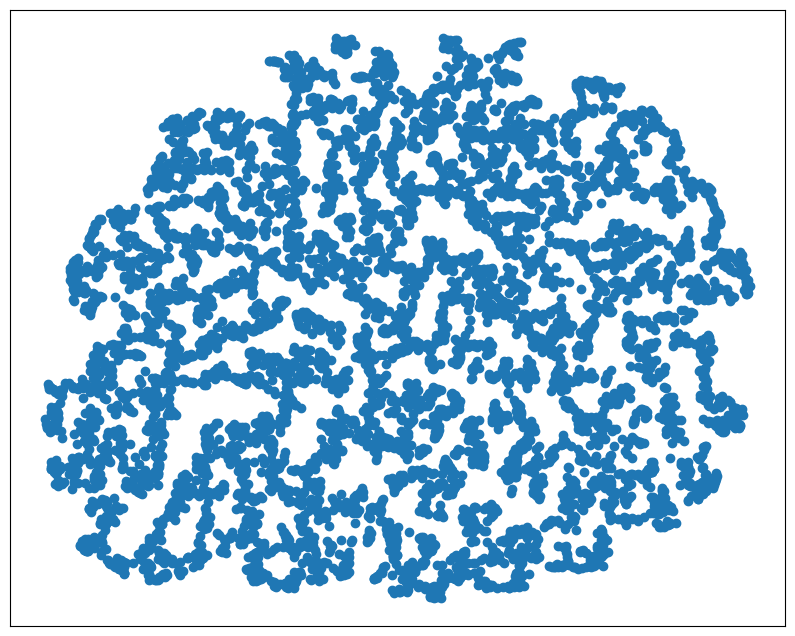

In [23]:
plt.figure(figsize = (10,8))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.xticks([])
plt.yticks([])
plt.show()

In [25]:
import numpy as np

# Check for any null values in the PCA result
null_values = np.isnan(pca_result).sum()

print(f"Total number of null values in pca_result: {null_values}")

Total number of null values in pca_result: 0


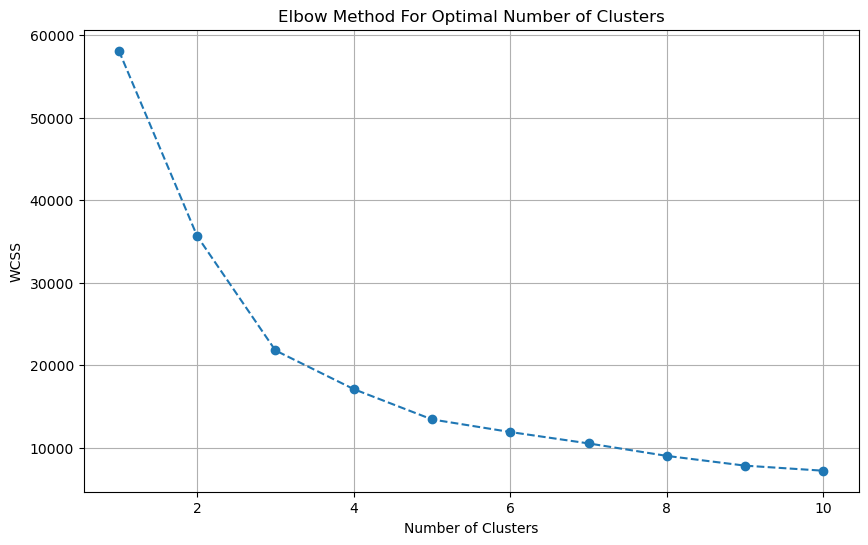

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)

In [29]:
opt_clusters = 3  

kmeans = KMeans(n_clusters=opt_clusters, random_state=702)
kmeans.fit(pca_result)

cluster_labels = kmeans.labels_

sm_df['Cluster'] = cluster_labels

In [31]:
sm_df[sm_df['Cluster'] == 0].describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,Cluster
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,...,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.0
mean,6.471400,1.858974,2.266272,4.907298,1.189349,1.619822,1.295365,2.644477,1.516272,0.920118,...,1.530572,0.797337,1.342702,0.886588,2.714004,2.330868,0.564103,0.008383,0.499507,0.0
std,4.431206,1.369134,3.132355,3.393352,1.117932,2.244533,1.403723,3.948901,1.465011,0.986605,...,2.026113,1.009014,2.695244,1.061948,3.312541,2.791999,0.803503,0.096453,2.131933,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,6.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,3.000000,3.000000,7.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.0
max,26.000000,8.000000,26.000000,21.000000,9.000000,17.000000,8.000000,33.000000,9.000000,7.000000,...,14.000000,7.000000,24.000000,7.000000,19.000000,18.000000,6.000000,2.000000,26.000000,0.0


In [33]:
sm_df[sm_df['Cluster'] == 1].describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,Cluster
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,...,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.0
mean,3.623023,1.362162,1.279880,1.851051,0.672673,0.838639,0.993994,1.385786,0.831031,0.567968,...,0.315315,0.466466,0.446446,0.405806,0.960360,0.461461,0.231431,0.005606,0.365365,1.0
std,2.749418,1.178999,1.683552,1.857627,0.814592,1.282483,1.265973,2.297358,1.059824,0.794665,...,0.646666,0.781383,1.131203,0.712387,1.713579,0.874977,0.489879,0.077303,1.669067,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,18.000000,7.000000,17.000000,14.000000,5.000000,11.000000,9.000000,18.000000,8.000000,6.000000,...,5.000000,6.000000,12.000000,6.000000,11.000000,7.000000,3.000000,2.000000,20.000000,1.0


In [35]:
sm_df[sm_df['Cluster'] == 2].describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,Cluster
count,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,...,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.0
mean,4.016298,1.694994,1.750873,2.395809,0.740396,1.119907,5.788126,2.110594,4.410943,2.451688,...,1.023283,3.859139,0.756694,2.591385,1.423749,0.958091,0.408615,0.006985,0.396973,2.0
std,3.195235,1.350166,2.576269,2.332357,0.880446,1.664328,2.998337,3.748581,2.521224,1.662960,...,1.211606,2.291658,1.793588,1.795999,2.225555,1.399505,0.629108,0.083332,1.795368,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,3.000000,1.000000,...,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,1.000000,4.000000,2.000000,...,1.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.0
75%,5.000000,2.000000,2.000000,3.000000,1.000000,2.000000,7.000000,2.000000,6.000000,3.000000,...,1.000000,5.000000,1.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.0
max,22.000000,8.000000,20.000000,18.000000,5.000000,14.000000,20.000000,37.000000,16.000000,10.000000,...,8.000000,14.000000,19.000000,11.000000,19.000000,10.000000,5.000000,1.000000,17.000000,2.0


In [37]:
sm_df.groupby('Cluster').mean()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
Cluster,,,,,,,,,,,,,,,,,,,,,
0,6.471400,1.858974,2.266272,4.907298,1.189349,1.619822,1.295365,2.644477,1.516272,0.920118,...,0.848619,1.530572,0.797337,1.342702,0.886588,2.714004,2.330868,0.564103,0.008383,0.499507
1,3.623023,1.362162,1.279880,1.851051,0.672673,0.838639,0.993994,1.385786,0.831031,0.567968,...,0.517718,0.315315,0.466466,0.446446,0.405806,0.960360,0.461461,0.231431,0.005606,0.365365
2,4.016298,1.694994,1.750873,2.395809,0.740396,1.119907,5.788126,2.110594,4.410943,2.451688,...,5.037253,1.023283,3.859139,0.756694,2.591385,1.423749,0.958091,0.408615,0.006985,0.396973


## Cluster 0: General Interests with Moderate Engagement

### Key Characteristics:

- **Chatter:** Moderate interest in social interaction.
- **Photo Sharing:** Moderate engagement in sharing photos.
- **Sports Fandom:** Low involvement in sports fandom.
- **Politics:** Moderate interest in political content.
- **Personal Fitness:** Somewhat interested in fitness.

### Segment Description:

This segment seems to target a much more vaguely represented population of the data. This group seems to categorize people who have a possiblity of gaining interest in the product, but it may be more beneficial for the company to defer their efforts to target another segment of the population. These seem like depressed people who are trying to get their life together and decided to buy a vitamin to get that process started. 

Though this segment consists of users who have a general interest in various topics but aren't heavily engaged in any specific area, it could be generalized . They are moderately active in social interactions and content sharing but do not show a strong preference for any particular type of content.

## Cluster 1: Socially Active and Diverse Interests

### Key Characteristics:

- **Sports Fandom:** Strong interest in sports fandom.
- **Politics:** Higher engagement with political content.
- **Food:** Strong interest in food-related content.
- **Religion:** Significant interest in religious content.
- **Parenting:** High engagement in parenting-related content.

### Segment Description:

This segment seems to target an older generation than the other two segments, most likely parents who want to be healthy and fit. Given that this group has a strong interest in religious and political content, I would hypothesize that this is a conservative leaning group of middle aged parents who are health conscious. 

This segment is socially active and diverse in their interests. They are particularly engaged in sports, politics, and religious content. Parenting and food-related content are also significant areas of interest. This group seems to represent a population of people who 

## Cluster 2: High Engagement with Fitness and Fashion

### Key Characteristics:

**Chatter:** High level of social interaction.
**Photo Sharing:** Very high engagement in sharing photos.
**Personal Fitness:** Strong interest in personal fitness.
**Fashion:** High interest in fashion-related content.
**Travel:** Significant interest in travel.

### Segment Description:

Whereas the first cluster shares some similar content, this segment seems to target a younger and more feminine population of the market, most likely older gen z or younger millenials who are interested in being healthy, fit, beautiful and posting that information to social media. 

This segment is characterized by high engagement in social interactions, particularly through photo sharing. They are highly interested in personal fitness and fashion, making them a prime target for health, fitness, and lifestyle brands. Travel is also an important area for this group, more so than the other groups on average, suggesting they are likely to engage with travel-related content and products.

## Market Segment Summary:

**Segment 1 (Cluster 0):** General audience with moderate engagement across various topics.
**Segment 2 (Cluster 1):** Socially active users with diverse and strong interests in sports, politics, religion, and parenting.
**Segment 3 (Cluster 2):** Highly engaged users focused on fitness, fashion, and travel, with a strong presence in social interactions and photo sharing.

These segments can be used to tailor marketing strategies, product recommendations, or content delivery to better meet the needs and preferences of each group

## Final Analysis

One fundamental assumption we are making on the basis of the name of the brand is that it is primarily focused on selling "health-promoting" goods. To that extent, two of the three clusters are strongly interested in fitness reflects on their ability to grab the attention of an interested audience. Moreover, the fact that there are  The most highly engaged cluster seems to have a heavy interest in fashion, fitness, and photo-sharing. Running a social media campaign aimed at this cluster focusing on sharing content around their thoughts, opinions, and feelings about any combination of those three topics can have some promise in fostering greater brand loyalty.